In [21]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## EX1:
Cho bài toán XOR
Implement thuât toán neural network để giải bài toán dùng Pytorch

In [97]:
# Hàm kích hoạt sigmoid
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

# Hàm huấn luyện mô hình
def train_model(X, y, W1, b1, W2, b2, learning_rate, num_epochs):
    for epoch in range(num_epochs):
        # Forward pass
        z1 = torch.matmul(X, W1) + b1
        a1 = sigmoid(z1)
        z2 = torch.matmul(a1, W2) + b2
        output = sigmoid(z2)

        # Tính loss
        loss = ((output - y) ** 2).mean()

        # Backpropagation
        loss.backward()

        # Cập nhật trọng số
        with torch.no_grad():
            W2 -= learning_rate * W2.grad
            b2 -= learning_rate * b2.grad
            W1 -= learning_rate * W1.grad
            b1 -= learning_rate * b1.grad

            # Đặt gradient về 0
            W2.grad.zero_()
            b2.grad.zero_()
            W1.grad.zero_()
            b1.grad.zero_()

        #if (epoch + 1) % 1000 == 0:
        #    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')


# Hàm kiểm tra mô hình
def test_model(X, W1, b1, W2, b2):
    with torch.no_grad():
        z1 = torch.matmul(X, W1) + b1
        a1 = sigmoid(z1)
        z2 = torch.matmul(a1, W2) + b2
        output = sigmoid(z2)
        rounded_output = torch.round(output)

       # print("Dự đoán kết quả:")
        for i in range(len(X)):
            print(f"Input: {X[i].tolist()}, Output: {rounded_output[i].item()}")


In [98]:
# Dữ liệu đầu vào (XOR)
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

In [99]:
# Gọi hàm train_model và test_model
input_size = 2
hidden_size = 2
output_size = 1
learning_rate = 0.1
num_epochs = 10000

# Khởi tạo trọng số cho các lớp
W1 = torch.randn(input_size, hidden_size, requires_grad=True)
b1 = torch.randn(1, hidden_size, requires_grad=True)
W2 = torch.randn(hidden_size, output_size, requires_grad=True)
b2 = torch.randn(1, output_size, requires_grad=True)

# Huấn luyện mô hình
train_model(X, y, W1, b1, W2, b2, learning_rate, num_epochs)

# Kiểm tra mô hình
test_model(X, W1, b1, W2, b2)

Input: [0.0, 0.0], Output: 0.0
Input: [0.0, 1.0], Output: 1.0
Input: [1.0, 0.0], Output: 1.0
Input: [1.0, 1.0], Output: 0.0


## EX2
Cho dataset MNIST
- Implement thuật toán neural network với dữ liệu trên sử dụng Pytorch
- Chỉnh learning rate, vẽ đồ thị loss tương ứng.
- Chia tập train/test tỉ lệ 80/20, tính các chỉ số MSE, RSME, MAE, MAPE trên tập test.


### 1. Implement

In [76]:
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))
# Đạo hàm của sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)

# Hàm softmax để tính xác suất của các lớp
def softmax(x):
    exp_x = torch.exp(x - torch.max(x))  # Tránh tràn số
    return exp_x / exp_x.sum(dim=0, keepdim=True)

# Khởi tạo trọng số ngẫu nhiên
def initialize_weights(input_size, hidden_size, output_size):
    W1 = torch.randn(input_size, hidden_size)
    b1 = torch.zeros(1, hidden_size)
    W2 = torch.randn(hidden_size, output_size)
    b2 = torch.zeros(1, output_size)
    return W1, b1, W2, b2

# Hàm feedforward
def feedforward(X, W1, b1, W2, b2):
    z1 = torch.matmul(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = torch.matmul(a1, W2) + b2
    return z2, a1

# Hàm huấn luyện mô hình
def neural_network_model(X, y, input_size, hidden_size, output_size, learning_rate, num_epochs):
    W1, b1, W2, b2 = initialize_weights(input_size, hidden_size, output_size)
    losses = []
    
    for epoch in range(num_epochs):
        # Forward pass
        z2, a1 = feedforward(X, W1, b1, W2, b2)
        probs = softmax(z2)
        
        # Tính loss
        loss = -torch.log(probs[range(len(X)), y]).mean()
        losses.append(loss.item())
        
        # Backpropagation
        delta3 = probs
        delta3[range(len(X)), y] -= 1
        grad_W2 = torch.matmul(a1.t(), delta3)
        grad_b2 = delta3.sum(dim=0, keepdim=True)
        delta2 = torch.matmul(delta3, W2.t()) * sigmoid_derivative(a1)
        grad_W1 = torch.matmul(X.t(), delta2)
        grad_b1 = delta2.sum(dim=0, keepdim=True)
        
        # Cập nhật trọng số
        W2 -= learning_rate * grad_W2
        b2 -= learning_rate * grad_b2
        W1 -= learning_rate * grad_W1
        b1 -= learning_rate * grad_b1

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epoch')
    plt.show()
    return W1, b1, W2, b2

 #Hàm kiểm tra mô hình
def test_model(X, y, W1, b1, W2, b2):
    z2, _ = feedforward(X, W1, b1, W2, b2)
    probs = softmax(z2)
    y_pred = torch.argmax(probs, dim=1)
    #accuracy = (y_preds == y).float().mean()
    #print(f'Accuracy: {accuracy.item() * 100}%')
    return y_pred



In [45]:
batch_size_train = 64
batch_size_test = 1000
# Chuẩn bị dữ liệu MNIST
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [94]:
#examples = enumerate(test_loader)
#batch_idx, (example_data, example_targets) = next(examples)
#fig = plt.figure()
#for i in range(6):
#    plt.subplot(2,3,i+1)
 #   plt.tight_layout()
 #  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
 #   plt.title("Ground Truth: {}".format(example_targets[i]))
 #   plt.xticks([])
 #   plt.yticks([])
#fig

In [77]:
X_train = []
y_train = []
for images, labels in trainloader:
    X_train.append(images.view(-1, 28 * 28))
    y_train.append(labels)
X_train = torch.cat(X_train)
y_train = torch.cat(y_train)

X_test = []
y_test = []
for images, labels in testloader:
    X_test.append(images.view(-1, 28 * 28))
    y_test.append(labels)
X_test = torch.cat(X_test)
y_test = torch.cat(y_test)

In [35]:
print("Kích thước của X_train:", X_train.shape)
print("Kích thước của y_train:", y_train.shape)
print("Kích thước của X_test:", X_test.shape)
print("Kích thước của y_test:", y_test.shape)

Kích thước của X_train: torch.Size([60000, 784])
Kích thước của y_train: torch.Size([60000])
Kích thước của X_test: torch.Size([10000, 784])
Kích thước của y_test: torch.Size([10000])


### 2. Change learning rate

#### Small lr

Epoch [10/10], Loss: 17.934677124023438


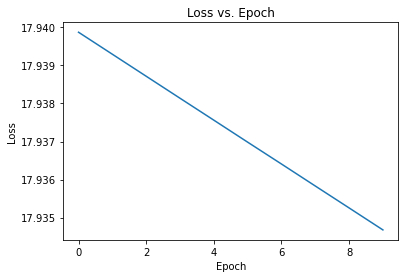

In [78]:
input_size = 28 * 28
hidden_size = 128
output_size = 10
learning_rate =1e-8
num_epochs = 10

# Huấn luyện mô hình
trained_weights = neural_network_model(X_train, y_train, input_size, hidden_size, output_size, learning_rate, num_epochs)

# Kiểm tra mô hình
#test_model(X_test, y_test, *trained_weights)


#### Moderate lr

Epoch [10/10], Loss: 11.754456520080566


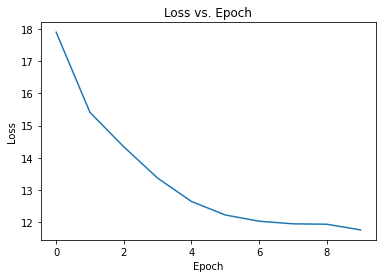

In [80]:
input_size = 28 * 28
hidden_size = 128
output_size = 10
learning_rate = 0.00005
num_epochs = 10

# Huấn luyện mô hình
trained_weights = neural_network_model(X_train, y_train, input_size, hidden_size, output_size, learning_rate, num_epochs)

#### Large lr

Epoch [10/10], Loss: nan


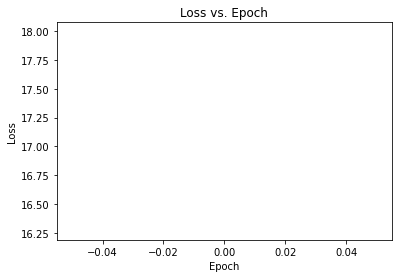

In [96]:
input_size = 28 * 28
hidden_size = 128
output_size = 10
learning_rate = 0.05
num_epochs = 10

# Huấn luyện mô hình
trained_weights = neural_network_model(X_train, y_train, input_size, hidden_size, output_size, learning_rate, num_epochs)

### 3. Calculate metrics

In [71]:

X_combined = torch.cat([X_train, X_test], dim=0)
y_combined = torch.cat([y_train, y_test], dim=0)

In [72]:
total_samples = X_combined.shape[0]
# Calculate the number of samples for the training set (80%)
train_samples = int(0.8 * total_samples)

# Split X_combined into X_train and X_test
X_train1 = X_combined[:train_samples]
X_test1 = X_combined[train_samples:]


total_samples = y_combined.shape[0]
train_samples = int(0.8 * total_samples)

y_train1 = y_combined[:train_samples]
y_test1 = y_combined[train_samples:]

Epoch [10/10], Loss: 11.29671859741211


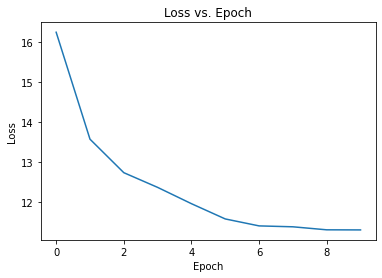

In [83]:
trained_weights = neural_network_model(X_train1, y_train1, input_size, hidden_size, output_size, learning_rate, num_epochs)
y_pred =test_model(X_test1, y_test1, *trained_weights)

In [90]:
y_test1 = y_test1.float()
y_pred = y_pred.float()

In [92]:
mse = ((y_pred - y_test1) ** 2).mean()
mae = torch.abs(y_pred - y_test1).mean()
rmse = torch.sqrt(((y_pred - y_test1) ** 2).mean())
mape = torch.abs((y_pred - y_test1) / y_test1).mean()

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2f}')

MSE: 13.99
RMSE: 3.74
MAE: 2.78
MAPE: nan


## EX3
Tại sao hàm softmax lại dùng exponential function (e) mà không phải số khác như 2, 3 hoặc 4

Softmax uses the exponential function (e) rather than other numbers like 2, 3, or 4 for several reasons:

- Probability Interpretation: Softmax is used to represent probabilities for multiple classes. The natural exponential (e) allows us to represent probabilities as non-negative values between 0 and 1. Using other numbers like 2, 3, or 4 may not provide the same probability interpretation.

- Stability: The natural exponential (e) helps maintain numerical stability during calculations. When using e, it's common to subtract the maximum value from the input values before applying the softmax function to avoid numerical overflow and underflow issues. This ensures that softmax calculations remain stable and accurate.

- Smoothness: Softmax with e generates a smooth probability distribution, which means that small changes in the input values lead to small changes in the output probabilities. This smoothness property is desirable in many machine learning and optimization scenarios.

- Consistency with Statistics and Probability: The use of e in softmax is consistent with statistical and probability theory, where e often appears in various contexts. It ensures that softmax aligns with established principles in these fields.

In summary, the choice of the natural exponential (e) in softmax has practical advantages, including probability interpretation, numerical stability, smoothness, and consistency with statistical and probability principles. While other numbers could theoretically be used, e has become the standard choice in machine learning and neural networks due to these advantages.